## Predict the price of cars in the data scrapped

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [9]:
#Reading the Data
data=pd.read_csv('Used_cars.csv')
data=data.drop('Unnamed: 0',axis=1)
data

,Make_Year,Brand,Model,Transmission,Kms,Owner,Variant,City,Price
0,2011,Toyota Corolla Altis,1.8 G Manual,Manual,"1,22,364 km",2nd Owner,Petrol + CNG,Mumbai,"['₹3,85,599']"
1,2013,Maruti Ritz,ZXI Manual,Manual,"14,047 km",1st Owner,Petrol,Mumbai,"['₹3,83,999']"
2,2016,Maruti Baleno,DELTA 1.2 K12 Manual,Manual,"11,510 km",2nd Owner,Petrol,Mumbai,"['₹5,06,399']"
3,2012,Honda Accord,2.4 MT Manual,Manual,"50,161 km",2nd Owner,Petrol,Mumbai,"['₹5,20,199']"
4,2016,Volkswagen Polo,TRENDLINE 1.2L PETROL Manual,Manual,"62,799 km",1st Owner,Petrol,Mumbai,"['₹4,67,599']"
...,...,...,...,...,...,...,...,...,...
3746,2012,Honda Brio,1.2 V MT I VTEC Manual,Manual,"44,196 km",2nd Owner,Petrol,Bengaluru,"['₹3,54,699']"
3747,2020,Maruti Swift,ZXI+ Manual,Manual,"13,366 km",2nd Owner,Petrol,Bengaluru,"['₹7,74,499']"
3748,2020,Mahindra XUV 3OO,W8 (O) DIESEL AT Automatic,Automatic,"15,075 km",1st Owner,Diesel,Bengaluru,"['₹14,68,799']"
3749,2011,Hyundai i10,SPORTZ 1.2 AT KAPPA2 Automatic,Automatic,"71,825 km",1st Owner,Petrol,Bengaluru,"['₹3,60,799']"


# EDA
## Understanding the Data

In [10]:
#Checking for null values 
data.isna().sum()

Make_Year       0
Brand           0
Model           0
Transmission    0
Kms             0
Owner           0
Variant         0
City            0
Price           0
dtype: int64

In [11]:
data.dtypes

Make_Year        int64
Brand           object
Model           object
Transmission    object
Kms             object
Owner           object
Variant         object
City            object
Price           object
dtype: object

## Data Cleaning

In [12]:
for i in range(len(data)):
    data['Kms'][i]=data['Kms'][i].replace("km", "").strip()
for i in range(len(data)):
    data['Kms'][i]=data['Kms'][i].replace(',', '')
# Convert single column to int dtype
data['Kms'] = pd.to_numeric(data['Kms'])
data.Owner.unique()

array(['2nd Owner', '1st Owner', '3rd Owner'], dtype=object)

In [13]:
for i in range(len(data)):
    data['Price'][i]=data['Price'][i].replace('[','').replace(']','').replace('₹','').replace(',','').replace("'",'')
data['Price']=pd.to_numeric(data['Price'])
data.City.unique()

array(['Mumbai', 'Gurgaon', 'Kolkata', 'Noida', 'Chennai', 'Pune',
       'Hyderabad', 'Bengaluru'], dtype=object)

# Univariate Analysis

<AxesSubplot:xlabel='City', ylabel='count'>

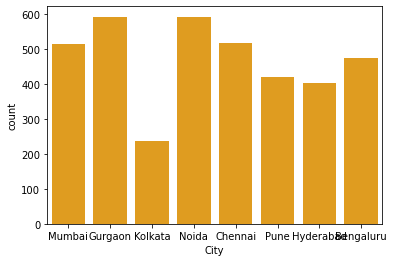

In [16]:
sns.countplot(data.City, color = 'Orange')

<AxesSubplot:xlabel='Owner', ylabel='count'>

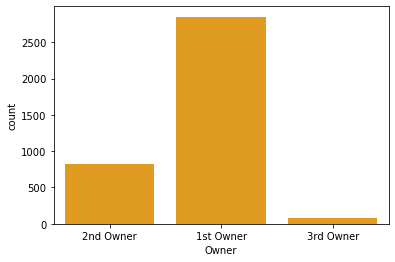

In [17]:
sns.countplot(data.Owner, color = 'Orange')


<AxesSubplot:xlabel='Price', ylabel='Density'>

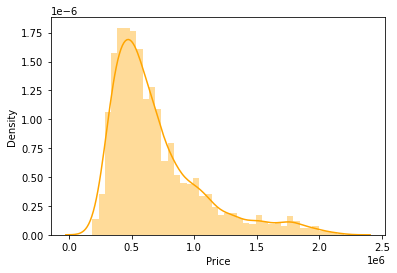

In [18]:
sns.distplot(data.Price, color = 'Orange')

In [19]:
for i in range(len(data)):
    a=data.Brand[i].split(" ")
    data.Model[i]=a[1::]
    data.Brand[i]=a[0]
for i in range(len(data)):
    if len(data.Model[i])==1:
        data.Model[i]=data.Model[i][0]
    if len(data.Model[i])==2:
        data.Model[i]=data.Model[i][0]+" "+data.Model[i][1]
    if len(data.Model[i])==3:
        data.Model[i]=data.Model[i][0]+" "+data.Model[i][1]+" "+data.Model[i][2]
data.Brand.unique()

array(['Toyota', 'Maruti', 'Honda', 'Volkswagen', 'BMW', 'Hyundai',
       'Tata', 'Ford', 'Renault', 'KIA', 'Mercedes', 'Datsun', 'MG',
       'Skoda', 'Mahindra', 'Jeep', 'Nissan', 'Audi', 'Jaguar', 'Fiat'],
      dtype=object)

In [20]:
data.Model.unique()

array(['Corolla Altis', 'Ritz', 'Baleno', 'Accord', 'Polo', '3 Series',
       'i 2 0', 'Grand i10', 'TIGOR', 'Swift Dzire', 'Swift',
       'Figo Aspire', 'Elite i20', 'Amaze', 'Verna', 'Kwid', 'Alto K10',
       'SELTOS', 'New Wagon-R', 'Etios Liva', 'Vento', 'Alto 800',
       'Benz C Class', 'Benz E Class', 'C R V', 'Tiago', 'City',
       'Harrier', 'Duster', 'Redi Go', 'TRIBER', 'Celerio', 'HECTOR',
       'URBAN CRUISER', 'Ciaz', 'Jazz', 'i20 Active', 'Rapid',
       'Vitara Brezza', 'Wagon R 1.0', 'XUV 3OO', 'Hexa', 'i 1 0',
       'TUV300', 'WR-V', 'Creta', 'XUV500', 'Ecosport', 'Xcent',
       'Tucson New', 'Brio', 'Dzire', 'Ameo', 'Figo', 'NEW SANTRO',
       'E o n', 'S PRESSO', 'Compass', 'VENUE', 'Etios', 'Civic',
       'Superb', 'New Elantra', 'Glanza', 'S Cross', 'Micra Active',
       'GRAND I10 NIOS', 'NEXON', 'IGNIS', 'ALTROZ', 'Alto', 'Terrano',
       'YARIS', 'Ertiga', 'Innova', 'Jetta', 'A   3', 'X   1', 'Kiger',
       'HECTOR PLUS', 'Micra', 'X   F', 'MAGNITE'

# Bi-variate Analysis

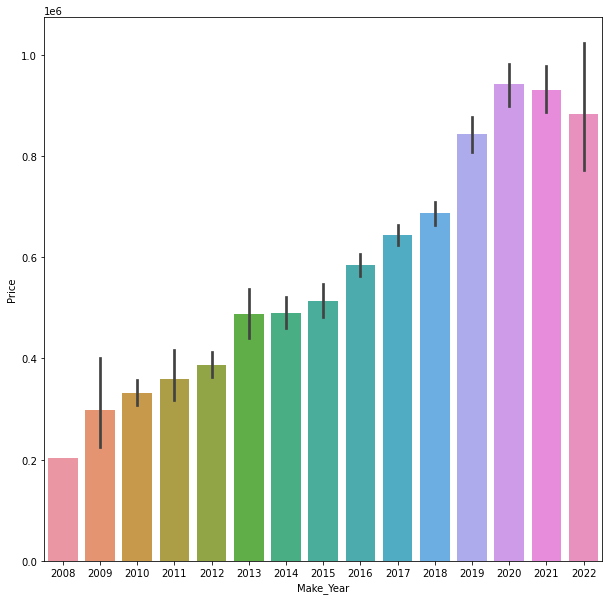

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Make_Year, y=data.Price)
brand_Unique=list(data.Brand.unique())
averagePrice=[]

# Co-Relation Matrix

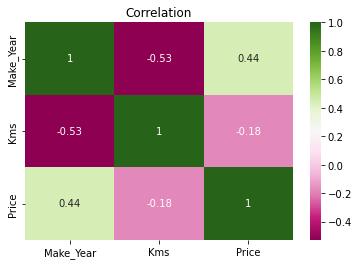

In [25]:
sns.heatmap(data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

# Dummy Values

In [26]:
# Using Dummy variable can also use Label Encoding
data=pd.get_dummies(data,drop_first=True)
data.head(2)

,Make_Year,Kms,Price,Brand_BMW,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,...,Variant_Petrol + CNG,Variant_Petrol + Ev,Variant_Petrol + LPG,City_Chennai,City_Gurgaon,City_Hyderabad,City_Kolkata,City_Mumbai,City_Noida,City_Pune
0,2011,122364,385599,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2013,14047,383999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Feature Engineering

In [27]:
data['Age of the vehicle']=2022-data['Make_Year']


In [28]:
# Removing Duplicates
data=data.drop_duplicates()
data.shape

(3591, 158)

In [29]:
# Splitting Dependent and Independent Variable
features = data.drop(["Price",'Make_Year'],axis=1)
target = data["Price"]

# Model Function

In [30]:
#Importing necessary libraries
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

def model_building(Features,target,model):
    Maximum_Accuracy=0

    test_size=[0.2,0.25,0.3]

    for j in test_size:
        for i in range(100):
            x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)

        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)

        if acc>Maximum_Accuracy:
            Maximum_Accuracy=acc
            print("R-square",Maximum_Accuracy,"Train set R Squared",check_acc,'Random state',i,'test_size',j)

# LINEAR REGRESSION

In [31]:
model_building(features,target,LinearRegression())

R-square 0.9170458064034965 Train set R Squared 0.9367935750233971 Random state 99 test_size 0.2


In [32]:
# creating empty list that will help us in the end to judge the best model
model_name=[]
mse=[]
mae=[]
R_sq=[]
rmse=[]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=99)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print(lr.score(x_train,y_train))
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))
print('RMSE Score',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))


0.938205055122747
MSE: 11874467741.008944
MAE: 73961.48417445632
r2_score: 0.9120526186841148
RMSE Score 108970.03138940973


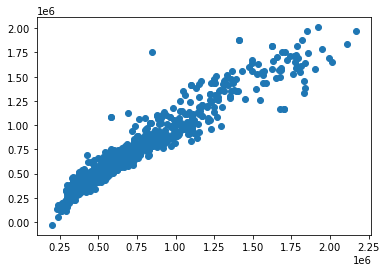

In [33]:
mse.append(mean_squared_error(lr_pred,y_test))
mae.append(mean_absolute_error(lr_pred,y_test))
R_sq.append(r2_score(lr_pred,y_test))
model_name.append("linear_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
plt.scatter(x=y_test,y=lr_pred)

# RIDGE REGRESSION

In [34]:
model_building(features,target,Ridge())

R-square 0.91670521508989 Train set R Squared 0.9322957774214293 Random state 99 test_size 0.2


In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto','svd','cholesky','lsqr']}
ridge=Ridge()
RR=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')
RR.fit(x_train,y_train)
print(RR.best_params_)

{'alpha': 0.01, 'solver': 'auto'}


R2_score: 0.9170897898944385
mse: 11519900478.867067
mae: 72941.3592562054
rmse: 107330.79930228353


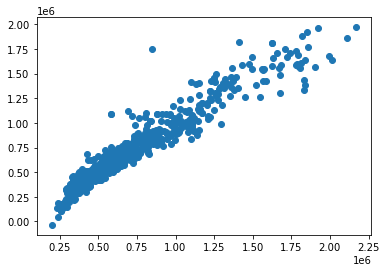

In [37]:
rr=Ridge(alpha=0.01,solver='auto')
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
print('R2_score:',r2_score(y_test,rr_pred))
print('mse:',metrics.mean_squared_error(y_test,rr_pred))
print('mae:',metrics.mean_absolute_error(y_test,rr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
mse.append(mean_squared_error(rr_pred,y_test))
mae.append(mean_absolute_error(rr_pred,y_test))
R_sq.append(r2_score(y_test,rr_pred))
model_name.append("ridge_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
plt.scatter(x=y_test,y=rr_pred)


# Lasso Regression

In [38]:
model_building(features,target,Lasso())

R-square 0.9171109297616915 Train set R Squared 0.9367927607431981 Random state 99 test_size 0.2


In [39]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
lasso=Lasso()
LS=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error')
LS.fit(x_train,y_train)
print(LS.best_params_)

{'alpha': 10}


R2_score: 0.9175332326411839
mse: 11458286640.184477
mae: 72591.632929028
rmse: 107043.3867185847


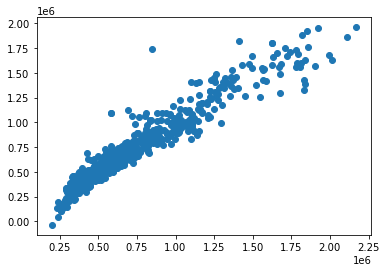

In [40]:
ls=Lasso(alpha=10)
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,ls_pred))
print('mse:',metrics.mean_squared_error(y_test,ls_pred))
print('mae:',metrics.mean_absolute_error(y_test,ls_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))

mse.append(mean_squared_error(ls_pred,y_test))
mae.append(mean_absolute_error(ls_pred,y_test))
R_sq.append(r2_score(y_test,ls_pred))
model_name.append("lasso_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))
plt.scatter(x=y_test,y=ls_pred)


# Xgboost Regressor

In [41]:
model_building(features,target,XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42))

R-square 0.9289885657785146 Train set R Squared 0.9784743039298281 Random state 99 test_size 0.2


In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
xgb1 = XGBRegressor(verbosity = 0, random_state=42)
parameters ={
        'objective':['reg:linear'],
         'max_depth': [1,2,3,4,5,6,7,8,9,10],
         'colsample_bylevel':[0.2,0.5,0.6,1],
         'learning_rate':[0.01,0.1,0.3,0.2,1],
         'n_estimators':[100,150,200,500]
                    }

xgb_grid = GridSearchCV(xgb1,parameters,cv=3)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)

{'colsample_bylevel': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'objective': 'reg:linear'}


R2_score: 0.945101704035153
mse: 7627804888.797454
mae: 54075.23846053547
rmse: 87337.30525266654


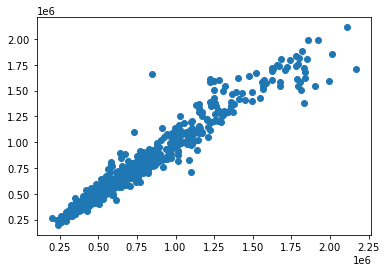

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
Xg=XGBRegressor(objective ='reg:linear',verbosity= 0, random_state=42, colsample_bylevel=0.5,learning_rate=0.2,max_depth= 5,n_estimators=500)
Xg.fit(x_train,y_train)
Xg_pred=Xg.predict(x_test)
print('R2_score:',r2_score(y_test,Xg_pred))
print('mse:',metrics.mean_squared_error(y_test,Xg_pred))
print('mae:',metrics.mean_absolute_error(y_test,Xg_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

mse.append(mean_squared_error(Xg_pred,y_test))
mae.append(mean_absolute_error(Xg_pred,y_test))
R_sq.append(r2_score(y_test,Xg_pred))
model_name.append("XGboost_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))
plt.scatter(x=y_test,y=Xg_pred)

# RANDOM FOREST

In [43]:
model_building(features,target,RandomForestRegressor())

R-square 0.928440693145844 Train set R Squared 0.9893723709466444 Random state 99 test_size 0.2


In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
model=RandomForestRegressor()
param_grid = { "n_estimators"   : [500,1000,1500],
              "min_samples_split" : [2,4,8],
             "bootstrap": [True, False]
            }
grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 1500}


R2_score: 0.929418638480339
mse: 9806877335.54411
mae: 60269.63495224849
rmse: 99029.67906412759


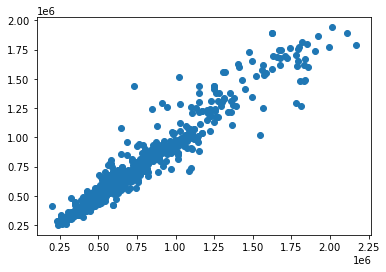

In [47]:
RF=RandomForestRegressor(n_estimators= 1500,bootstrap= True,min_samples_split=2,)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('R2_score:',r2_score(y_test,RF_pred))
print('mse:',metrics.mean_squared_error(y_test,RF_pred))
print('mae:',metrics.mean_absolute_error(y_test,RF_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

mse.append(mean_squared_error(RF_pred,y_test))
mae.append(mean_absolute_error(RF_pred,y_test))
R_sq.append(r2_score(y_test,RF_pred))
model_name.append("Random_forest_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))
plt.scatter(x=y_test,y=RF_pred)

In [48]:
# comparision
data = list(zip(model_name,mse,mae,rmse,R_sq))                                           
df = pd.DataFrame(data,columns=["Model","Mean_Sq_Error","Mean_Absolute_Error","Root Mean Squared Error",'R_sq'])                    #Creating DataFrame    
df

,Model,Mean_Sq_Error,Mean_Absolute_Error,Root Mean Squared Error,R_sq
0,linear_regression,1.187447e+10,73961.484174,108970.031389,0.912053
1,ridge_regression,1.151990e+10,72941.359256,107330.799302,0.917090
2,lasso_regression,1.145829e+10,72591.632929,107043.386719,0.917533
3,XGboost_regression,7.627805e+09,54075.238461,87337.305253,0.945102
4,Random_forest_regression,9.806877e+09,60269.634952,99029.679064,0.929419


# Pickle file of the model

In [49]:
import pickle

#saved the trained model in file with given name
pickle_out = open("car_price.pkl","wb") # name of my pickle file , wb -write
pickle.dump(Xg, pickle_out)
pickle_out.close()

# loading the pickeled model
pickle_in = open("car_price.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,...,709,710,711,712,713,714,715,716,717,718
Predicted,863447.125,1854672.375,440160.5625,696143.875,663312.25,573172.3125,459976.34375,335138.34375,372121.1875,595040.6875,...,567116.0,1666002.5,635507.25,1582453.125,622438.125,257197.109375,1099100.25,437661.5,350908.65625,276961.875
Original,784799.000,2012799.000,426699.0000,697799.000,683899.00,707499.0000,501099.00000,341699.00000,376099.0000,612199.0000,...,549799.0,1521199.0,533699.00,1557099.000,594099.000,282899.000000,1068999.00,428899.0,351399.00000,291599.000


# Case study Completed
# The price can be predicted more accurately if the condition of the car was known